In [1]:
!pip install opencv-python

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [7]:
# Import the 2 images from your drive
img1= cv2.imread('/content/drive/MyDrive/MLPR - Y4T3/messi.jpg')
type(img1)

numpy.ndarray

In [8]:
# Import the 2 images from your drive
img2 = cv2.imread('/content/drive/MyDrive/MLPR - Y4T3/lion.webp')
type(img2)

numpy.ndarray

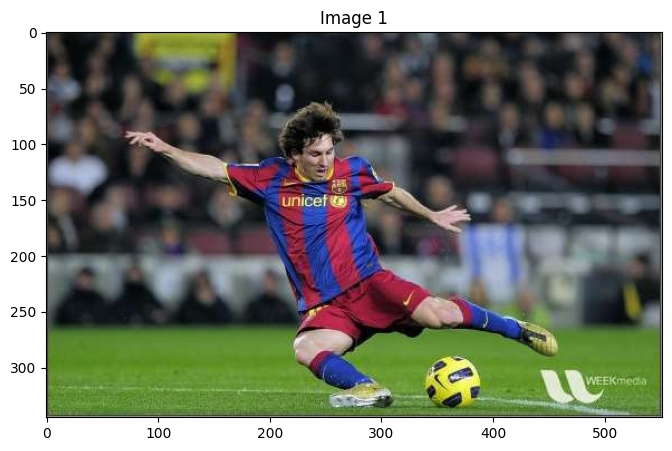

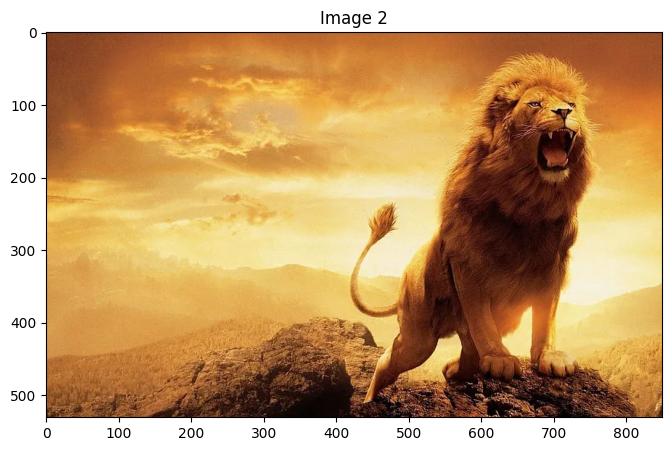

In [9]:
# convert the images from bgr to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# show the images for reference
plt.figure(figsize=(10,5))
plt.imshow(img1)
plt.title('Image 1')
plt.show()
plt.figure(figsize=(10,5))
plt.imshow(img2)
plt.title('Image 2')
plt.show()

##Obtain a grayscale version of the first image

(345, 552)


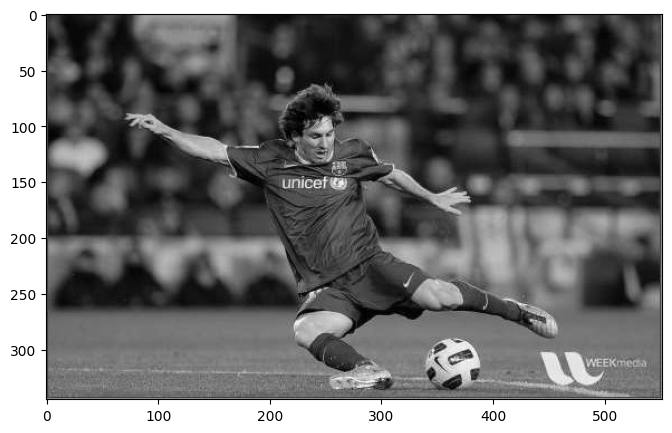

In [10]:
img1_gray= cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
print(img1_gray.shape)
plt.figure(figsize=(10,5))
plt.imshow(img1_gray,cmap='gray', vmin=0, vmax=255)
plt.show()

##Rotated version of the grayscale image

Height and width of original image 345 552
Original Image


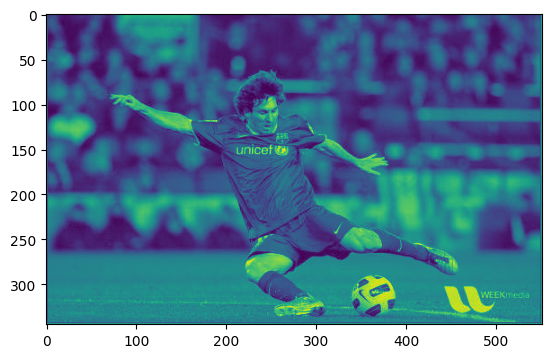

Rotated Image


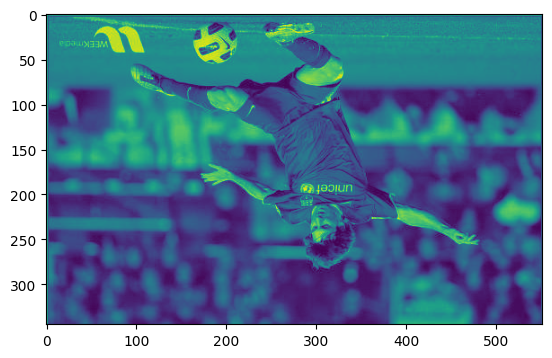

In [13]:
# First we need to obtain the center of original image by dividing height and width by 2
height, width = img1_gray.shape[:2]
print("Height and width of original image", height, width)
# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=180, scale=1)
# rotate the image using cv2.warpAffine
rotated_image1 = cv2.warpAffine(src=img1_gray, M=rotate_matrix, dsize=(width,
height))
print("Original Image")
plt.imshow(img1_gray)
plt.show()
print("Rotated Image")
plt.imshow(rotated_image1)
plt.show()

##Obtain and display the SIFT keypoints of the first image

(345, 552, 3)


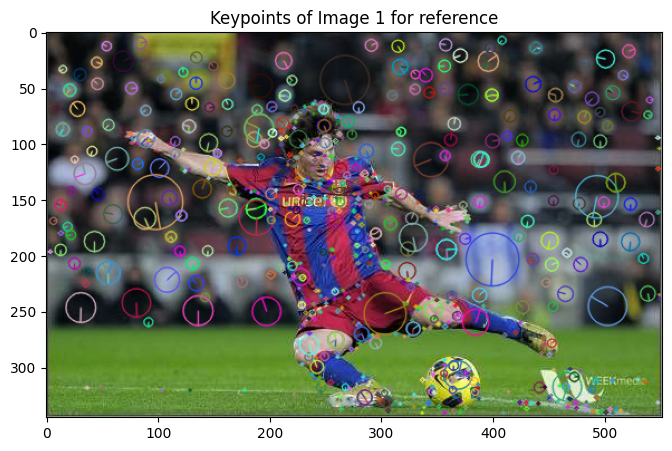

In [15]:
sift = cv2.SIFT_create()
kp = sift.detect(img1,None)
keypoints=cv2.drawKeypoints(img1,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2.imwrite('sift_keypoints.jpg',img1)
print(keypoints.shape)
plt.figure(figsize=(10,5))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()

#Part 1

##Use SIFT to detect the keypoints and descriptors of the first image and its grayscale version

In [16]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img1_gray,None)
len(keypoints_1), len(keypoints_2)

(774, 770)

##Create a brute force matcher to match the features from the two images

In [17]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

In [18]:
#How many matches do we have?
len(matches)

583

##Draw 200 out of the matched keypoints and decide whether or not the images are a match

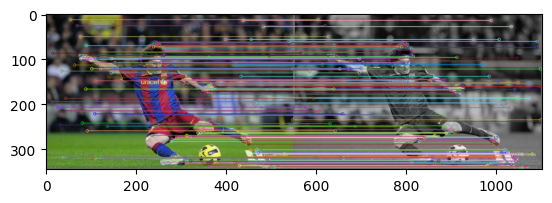

It's a Match!!!


In [19]:
img3 = cv2.drawMatches(img1, keypoints_1, img1_gray, keypoints_2, matches[:200],img1_gray, flags=2)
plt.imshow(img3),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")
else:
  print("The two images do not match")

#Part 2

##Use SIFT to detect the keypoints and descriptors of the image and its rotated grays version

In [20]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_3, descriptors_3 = sift.detectAndCompute(rotated_image1,None)
len(keypoints_1), len(keypoints_3)

(774, 742)

##Create a brute force matcher to match the features from the two images

In [21]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_3)
matches = sorted(matches, key = lambda x:x.distance)
#How many matches do we have?
len(matches)

537

##Draw 200 out of the matched keypoints and decide whether or not the images are a match

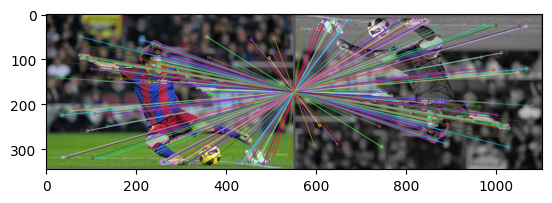

It's a Match!!!


In [22]:
img4 = cv2.drawMatches(img1, keypoints_1, rotated_image1, keypoints_3,matches[:200], rotated_image1, flags=2)
plt.imshow(img4),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")
else:
  print("The two images do not match")

#Part 3

##Use SIFT to detect the keypoints and descriptors of the first image (messi) and the second image (lion)

In [23]:
# using SIFT detect the feature descriptors of the 2 images
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_4, descriptors_4 = sift.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_4)

(774, 1188)

##Create a brute force matcher to match the features from the two images

In [24]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_4)
matches = sorted(matches, key = lambda x:x.distance)
#How many matches do we have?
len(matches)

210

##Draw 200 out of the matched keypoints and decide whether or not the images are a match.

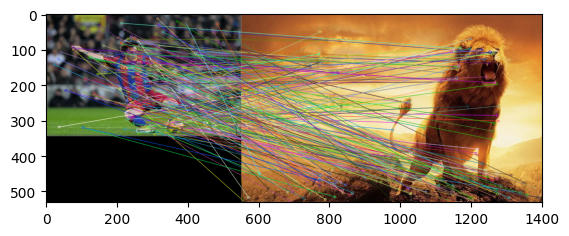

The two images do not match


In [25]:
img5 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_4, matches[:200], img2,flags=2)
plt.imshow(img5),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")
else:
  print("The two images do not match")

#Part 4 - SURF and ORB

##SURF

In [31]:
# build feature detector and descriptor extractor
hessian_threshold = 85
detector = cv2.SURF(hessian_threshold)
(hkeypoints, hdescriptors) = detector.detect(img1, None, useProvidedKeypoints = False)
(nkeypoints, ndescriptors) = detector.detect(img2, None, useProvidedKeypoints = False)

# extract vectors of size 64 from raw descriptors numpy arrays
rowsize = len(hdescriptors) / len(hkeypoints)
if rowsize > 1:
    hrows = np.array(hdescriptors, dtype = np.float32).reshape((-1, rowsize))
    nrows = np.array(ndescriptors, dtype = np.float32).reshape((-1, rowsize))
    #print hrows.shape, nrows.shape
else:
    hrows = np.array(hdescriptors, dtype = np.float32)
    nrows = np.array(ndescriptors, dtype = np.float32)
    rowsize = len(hrows[0])

# kNN training - learn mapping from hrow to hkeypoints index
samples = hrows
responses = np.arange(len(hkeypoints), dtype = np.float32)
#print len(samples), len(responses)
knn = cv2.KNearest()
knn.train(samples,responses)

# retrieve index and value through enumeration
for i, descriptor in enumerate(nrows):
    descriptor = np.array(descriptor, dtype = np.float32).reshape((1, rowsize))
    #print i, descriptor.shape, samples[0].shape
    retval, results, neigh_resp, dists = knn.find_nearest(descriptor, 1)
    res, dist =  int(results[0][0]), dists[0][0]
    #print res, dist

    if dist < 0.1:
        # draw matched keypoints in red color
        color = (0, 0, 255)
    else:
        # draw unmatched in blue color
        color = (255, 0, 0)
    # draw matched key points on haystack image
    x,y = hkeypoints[res].pt
    center = (int(x),int(y))
    cv2.circle(img1,center,2,color,-1)
    # draw matched key points on needle image
    x,y = nkeypoints[i].pt
    center = (int(x),int(y))
    cv2.circle(img2,center,2,color,-1)

cv2.imshow('messi',img1)
cv2.imshow('lion',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'SURF'

In [27]:
# using SURF detect the feature descriptors of the 2 images
surf = cv2.xfeatures2d.SURF_create()
keypoints_1, descriptors_1 = surf.detectAndCompute(img1,None)
keypoints_4, descriptors_4 = surf.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_4)

error: OpenCV(4.8.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_4)
matches = sorted(matches, key = lambda x:x.distance)
#How many matches do we have?
len(matches)

In [ ]:
img6 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_4, matches[:200], img2,flags=2)
plt.imshow(img6),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")
else:
  print("The two images do not match")

##ORB

In [28]:
# using ORB detect the feature descriptors of the 2 images
orb = cv2.ORB_create()
keypoints_1, descriptors_1 = orb.detectAndCompute(img1,None)
keypoints_4, descriptors_4 = orb.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_4)

(500, 500)

In [29]:
# create a bruteforce matcher
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_4)
matches = sorted(matches, key = lambda x:x.distance)
#How many matches do we have?
len(matches)

140

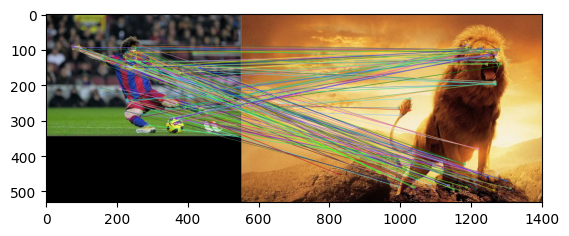

The two images do not match


In [30]:
img7 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_4, matches[:200], img2,flags=2)
plt.imshow(img7),plt.show()
# decide whether the images are a match or not based on the number of good matches.
if len(matches)> 0.6 * len(keypoints_1):
  print("It's a Match!!!")
else:
  print("The two images do not match")